In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
#from simple_fc import *
#from vaegan_fc import *
#from vaegan_conv import *
from full_bayes import Full_Bayes
from full_bayes_fc import *
#from vae2 import Variational_Autoencoder
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [61]:
tf.reset_default_graph()

In [62]:
sess = tf.InteractiveSession()
build_encoder = Encoder(200)
build_decoder = Decoder(200)

In [63]:
model = Full_Bayes(sess, build_encoder, build_decoder, dataset=mnist.train,
                  batch_size=100, z_dim=100, x_dim = 28**2,
                  learning_rate=1e-4, num_epochs=10, load=False, lr_decay=0.95, checkpoint_name='test', hidden_dim=100)

In [65]:
model.train()

Epoch 11 loss: 37779.884858 (time: 7.43784809113 s)
Epoch 12 loss: 37777.2350852 (time: 7.30581593513 s)
Epoch 13 loss: 37780.540206 (time: 7.24637508392 s)
Epoch 14 loss: 37762.7034233 (time: 7.64860010147 s)
Epoch 15 loss: 37715.4669815 (time: 7.29382014275 s)
Epoch 16 loss: 37697.0256037 (time: 7.18150997162 s)
Epoch 17 loss: 37716.6609091 (time: 7.2082028389 s)
Epoch 18 loss: 37756.0758665 (time: 7.1682369709 s)
Epoch 19 loss: 37698.7936648 (time: 7.20013618469 s)
Epoch 20 loss: 37739.2308736 (time: 7.40383696556 s)
0.0759128491084 min


In [66]:
generated_images = model.generate()

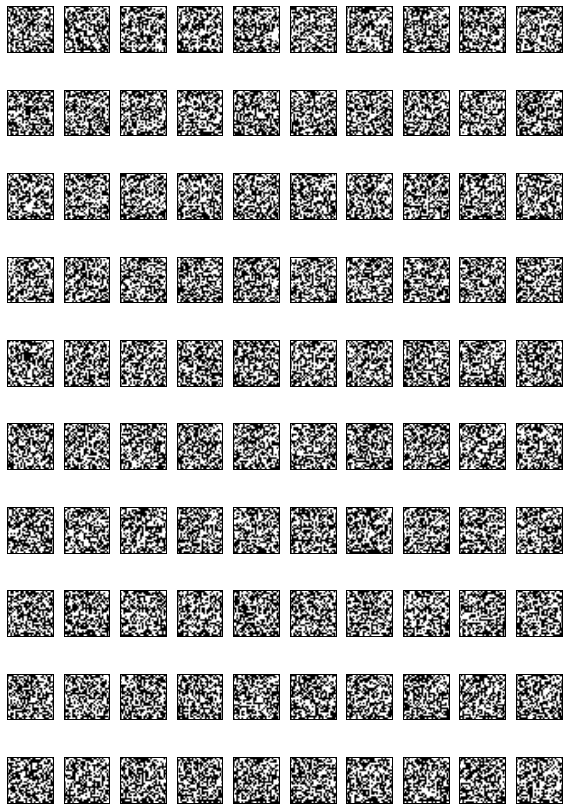

In [67]:
num_examples=10
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28,28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()